In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [4]:
# open csv file
arquivo_csv = 'dados_3m.csv'

original = pd.read_csv(arquivo_csv, ';')

In [5]:
df = original.copy()

In [6]:
#linhas e colunas
df.shape

(1009, 34)

In [7]:
#TRATAMENTO DOS DADOS

In [8]:
# apenas palmeiras com altura entre 3 e 4 m
df = df[df['Altura Palmeira (m)'] == 3]

In [9]:
#drop all the columns where all the data is empty
df = df.dropna(how='all', axis='columns')

In [10]:
#Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [11]:
df.shape

(193, 13)

In [12]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Nativa,Estágio sucessional
0,29/11/2019,1.0,3.0,Copa,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Classificada
1,29/11/2019,1.0,3.0,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,3,N,Umbrófila
2,29/11/2019,1.0,3.0,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,"4,5",N,Umbrófila
3,29/11/2019,1.0,3.0,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,"5,4",S,Secundária Inicial
4,29/11/2019,1.0,3.0,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,"10,8",S,Secundária Inicial


In [13]:
#tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira               float64
Altura Palmeira (m)    float64
Área                    object
Quadrante              float64
Número                  object
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Nativa                  object
Estágio sucessional     object
dtype: object


In [14]:
#Ajustando os tipos de dados

df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype(str)
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

#troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')



In [15]:
#tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                   object
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Nativa                   object
Estágio sucessional      object
dtype: object


In [16]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Nativa,Estágio sucessional
0,29/11/2019,1.0,3.0,Copa,1.0,NaN,nan,nan,nan,NaN,NaN,nan,Não Classificada
1,29/11/2019,1.0,3.0,Copa,2.0,2,Rubiaceae,Coffea,Coffea arabica,34.0,3.0,N,Umbrófila
2,29/11/2019,1.0,3.0,Copa,2.0,3,Rubiaceae,Coffea,Coffea arabica,29.0,4.5,N,Umbrófila
3,29/11/2019,1.0,3.0,Copa,2.0,4,Sapindaceae,Cupania,Cupania oblongifolia,58.0,5.4,S,Secundária Inicial
4,29/11/2019,1.0,3.0,Copa,2.0,5,Sapindaceae,Cupania,Cupania oblongifolia,164.0,10.8,S,Secundária Inicial


In [17]:
#new shape
df.shape

(193, 13)

In [18]:
#Ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [19]:
#Ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [20]:
#Remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [21]:
#contar registros em cada grupo em estudo
df['Área'].value_counts()

Entorno    135
Copa        58
Name: Área, dtype: int64

In [22]:
#Dataframe com quadrantes sem plantas (df_with_nan)
df_with_nan= df.copy()
#df_with_nan['Número'] =  df_with_nan['Número'].fillna(0)
df_with_nan['Área'].value_counts()

Entorno    135
Copa        58
Name: Área, dtype: int64

In [23]:
#quantidade de individuos nas parcelas da copa
copa_with_nan = df_with_nan[df_with_nan['Área'] == 'Copa']
abundancia_copa = copa_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_copa

Palmeira  Quadrante
1         1.0          0
          2.0          8
          3.0          0
          4.0          1
2         1.0          2
          2.0          1
          3.0          3
          4.0          3
3         1.0          2
          2.0          0
          3.0          5
          4.0          3
4         1.0          2
          2.0          3
          3.0          5
          4.0          4
5         1.0          5
          2.0          2
          3.0          2
          4.0          4
Name: Número, dtype: int64

In [24]:
#Percentual de individuos sob as copas
total_parcelas_copa = abundancia_copa.count()
copa_0_2 = (abundancia_copa[abundancia_copa < 3 ].count() / total_parcelas_copa) * 100
copa_3_5 = (abundancia_copa[abundancia_copa[(abundancia_copa >= 3) & (abundancia_copa <6)]].count()/ total_parcelas_copa) * 100
copa_6_8 = (abundancia_copa[abundancia_copa[(abundancia_copa > 6) ]].count() / total_parcelas_copa) * 100
dados_copa = [copa_0_2,copa_3_5,copa_6_8]
dados_copa

[50.0, 45.0, 5.0]

Text(0.5,0,'Quantidade de regenerantes por parcela sob as copas')

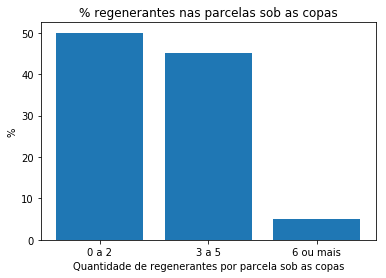

In [25]:
legendas = ['0 a 2', '3 a 5', '6 ou mais']
dados = dados_copa

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas sob as copas")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes por parcela sob as copas")


In [26]:
#quantidade de individuos nas parcelas no entorno
entorno_with_nan = df_with_nan[df_with_nan['Área'] == 'Entorno']
abundancia_entorno = entorno_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_entorno

Palmeira  Quadrante
1         1.0           3
          2.0          10
          3.0           6
          4.0           3
2         1.0           3
          2.0           4
          3.0           4
          4.0           4
3         1.0           9
          2.0           3
          3.0           4
          4.0           6
4         1.0           7
          2.0           8
          3.0           9
          4.0          13
5         1.0           6
          2.0          13
          3.0          14
          4.0           6
Name: Número, dtype: int64

In [27]:
#Percentual de invidiviudos nas parcelas do entorno
total_parcelas_entorno = abundancia_entorno.count()
entorno_0_2 = (abundancia_entorno[abundancia_entorno < 3 ].count() / total_parcelas_entorno) * 100
entorno_3_5 = (abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 3) & (abundancia_entorno <6)]].count() / total_parcelas_entorno) * 100
entorno_6_14 =(abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 6) ]].count() / total_parcelas_entorno) * 100
dados_entorno = [entorno_0_2,entorno_3_5,entorno_6_14]
dados_entorno

[0.0, 40.0, 60.0]

Text(0.5,0,'Quantidade de regenerantes por parcela no entorno')

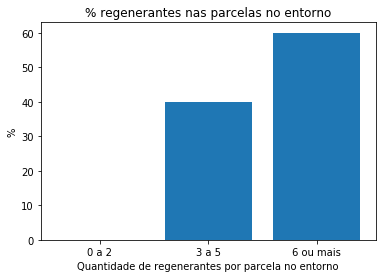

In [28]:
legendas = ['0 a 2', '3 a 5', '6 ou mais']
dados = dados_entorno

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes por parcela no entorno")


In [29]:
#TESTES ESTATISTICOS DE NORMALIDADE NA ABUNDÂNCIA DE REGENERANTES NAS PARCELAS DO ENTORNO E DA COPA

# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados da copa
stat, p = shapiro(abundancia_copa)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
	print('Grupo COPA tem distribuição normal (aceita H0)')
else:
	print('Grupo COPA não tem distribuição normal (rejeita H0)')


Statistics=0.931, p=0.164
Grupo COPA tem distribuição normal (aceita H0)


In [30]:
# 2 - Shapiro-Wilk Test (teste de normalidade) para os dados do entorno
stat, p = shapiro(abundancia_entorno)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal (rejeita H0)')

Statistics=0.878, p=0.016
Grupo ENTORNO não tem distribuição normal (rejeita H0)


In [31]:
# 3 - Mann-Whitney test (dados com distribuicao nao normal)
stat, p = mannwhitneyu(abundancia_copa, abundancia_entorno)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição (aceita H0)')
else:
	print('Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=57.500, p=0.000
Diferentes distribuiçoes (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes


In [32]:
#Dataframe sem quadrantes e numeros nulos (df_without_nan)
df_without_nan = df.copy()
df_without_nan.dropna(subset=[ 'Número'], inplace=True)
df_without_nan['Área'].value_counts()

Entorno    135
Copa        55
Name: Área, dtype: int64

In [33]:
#contar registros em cada coluna - área da copa
df_without_nan[df_without_nan['Área'] == 'Copa'].count()

Data                   55
Palmeira               55
Altura Palmeira (m)    55
Área                   55
Quadrante              55
Número                 55
Família                55
Gênero                 55
Espécie                55
Altura (cm)            55
Dap (mm)               55
Nativa                 55
Estágio sucessional    55
dtype: int64

In [34]:
#contar registros em cada coluna - área do entorno
df_without_nan[df_without_nan['Área'] == 'Entorno'].count()

Data                   135
Palmeira               135
Altura Palmeira (m)    135
Área                   135
Quadrante              135
Número                 135
Família                135
Gênero                 135
Espécie                135
Altura (cm)            135
Dap (mm)               135
Nativa                 135
Estágio sucessional    135
dtype: int64

Text(0,0.5,'Número de indivíduos')

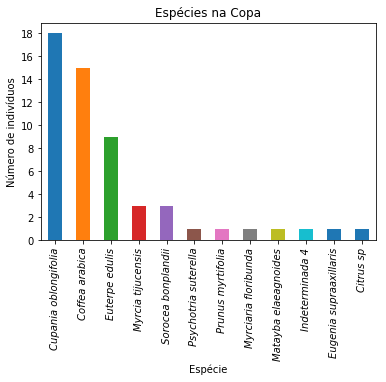

In [35]:
#Gráfico de barras da area das especies da area da copa ordenadas de forma descendente
plot_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_copa.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies na Copa")
plt.ylabel("Número de indivíduos")

Text(0,0.5,'Número de indivíduos')

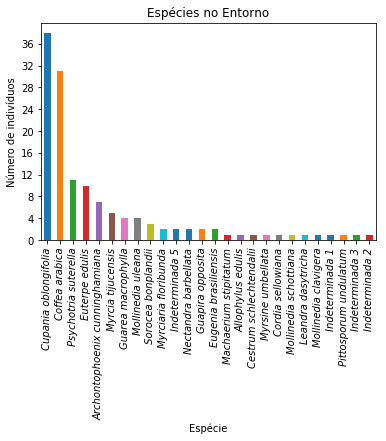

In [36]:
#Gráfico de barras da area das especies da area do entorno ordenadas de forma descendente
plot_entorno = df_without_nan[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_entorno.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies no Entorno")
plt.ylabel("Número de indivíduos")

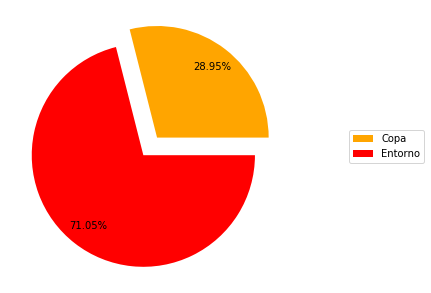

In [37]:
#Percentual de indivíduos arbóreos regenerantes sob a copa de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.

regenerantes_por_area = df_without_nan[~df_without_nan['Espécie'].isin(['Pendente'] )]
regenerantes_por_area = regenerantes_por_area.groupby('Área', as_index=False)['Número'].count() 
regenerantes_por_area = regenerantes_por_area[regenerantes_por_area > 0]
regenerantes_por_area = regenerantes_por_area.dropna()

labels = regenerantes_por_area['Área'].tolist()

sizes =  regenerantes_por_area['Número'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


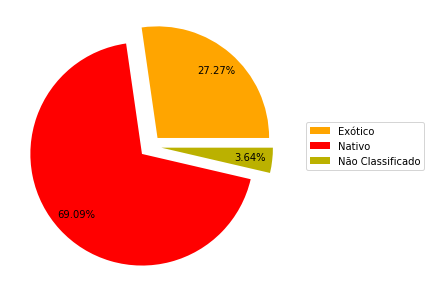

In [38]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos sob as copas de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


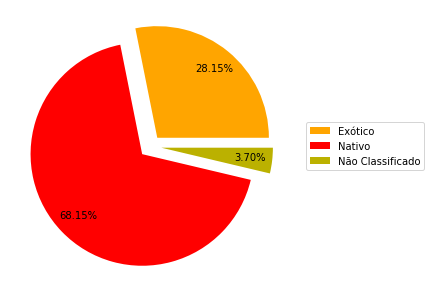

In [39]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos no entorno palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


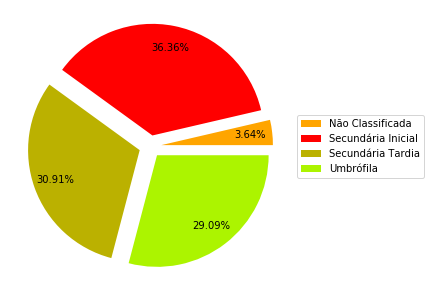

In [40]:
 #Proporção de indivíduos arbóreos regenerantes na COPA por ESTAGIO SUCESSIONAL
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()
labels
explode = [0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100',  '#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [41]:
labels

['Não Classificada', 'Secundária Inicial', 'Secundária Tardia', 'Umbrófila']

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


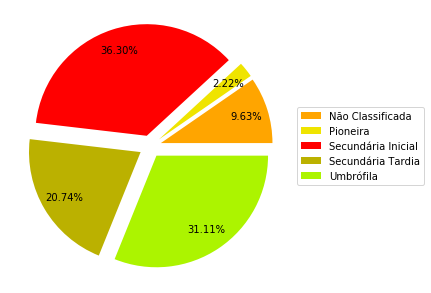

In [42]:
 #Proporção de indivíduos arbóreos regenerantes Pioneiros e Não Pioneiros no entorno de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500',  '#EFE400',  '#FF0000', '#BBB100','#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [43]:
#Distribuição das espécies  regenerantes

#especies copa
all_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
all_copa = all_copa[~all_copa['Espécie'].isin(['Pendente'] )]
all_copa = all_copa['Espécie']
all_copa = all_copa.drop_duplicates()

#especies entorno
all_entorno = df_without_nan[df_without_nan['Área'] == 'Entorno']
all_entorno = all_entorno[~all_entorno['Espécie'].isin(['Pendente'] )]
all_entorno = all_entorno['Espécie']
all_entorno = all_entorno.drop_duplicates()

#especies comuns nos dois grupos                     
comum_copa_entorno = all_copa[all_copa.isin(all_entorno)]

#especies exclusivas de determinada area
only_copa =  all_copa[~all_copa.isin(comum_copa_entorno)]
only_entorno =  all_entorno[~all_entorno.isin(comum_copa_entorno)]


In [44]:
#apenas copa

only_copa

58          Prunus myrtifolia
94       Matayba elaeagnoides
103                 Citrus sp
148    Eugenia supraaxillaris
152           Indeterminada 4
Name: Espécie, dtype: object

In [45]:
#apenas entorno
only_entorno

12              Mollinedia schottiana
51                   Guapira opposita
52                 Guarea macrophylla
68                  Mollinedia uleana
69              Pittosporum undulatum
70               Mollinedia clavigera
75              Machaerium stipitatum
77                    Indeterminada 1
78            Cestrum schlechtendalii
81               Eugenia brasiliensis
109                 Allophylus edulis
110                Leandra dasytricha
111    Archontophoenix cunninghamiana
120                 Myrsine umbellata
122              Nectandra barbellata
125                 Cordia sellowiana
129                   Indeterminada 5
174                   Indeterminada 3
182                   Indeterminada 2
Name: Espécie, dtype: object

In [46]:
#especies em comum
comum_copa_entorno

1            Coffea arabica
3      Cupania oblongifolia
8      Myrciaria floribunda
36           Euterpe edulis
91        Myrcia tijucensis
141      Sorocea bonplandii
142    Psychotria suterella
Name: Espécie, dtype: object

In [47]:
#merge
only_copa_qtd = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [only_copa.count()] })

only_entorno_qtd = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [only_entorno.count()] })

comum_copa_entorno_qtd = pd.DataFrame({'Área': ['Ambos'],
                        'Quantidade': [comum_copa_entorno.count()] })

merge = [only_copa_qtd,only_entorno_qtd, comum_copa_entorno_qtd]
resultado_merge = pd.concat(merge)

resultado_merge

,Área,Quantidade
0,Copa,5
0,Entorno,19
0,Ambos,7


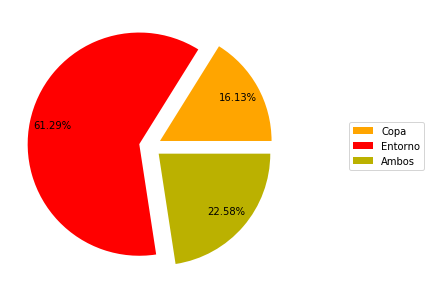

In [48]:
#grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [49]:
#Proporcao de individuos regenerantes na copa e no entorno 

#copa
copa_total = df_without_nan[df_without_nan['Área'] == 'Copa']
copa_total = copa_total[~copa_total['Espécie'].isin(['Pendente'] )]
copa_total = copa_total[['Espécie','Número', 'Área']]

copa_total_consolidada = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [copa_total['Número'].count()] })

#entorno
entorno_total = df[df['Área'] == 'Entorno']
entorno_total = entorno_total[~entorno_total['Espécie'].isin(['Pendente'] )]
entorno_total = entorno_total[['Espécie','Número', 'Área']]

entorno_total_consolidado = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [entorno_total['Número'].count()] })

merge = [copa_total_consolidada, entorno_total_consolidado]
resultado_merge = pd.concat(merge)

resultado_merge


,Área,Quantidade
0,Copa,55
0,Entorno,135


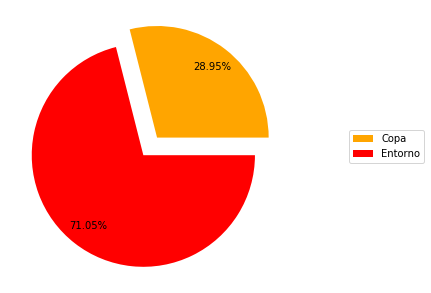

In [50]:
#Grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [51]:
#TESTES ESTATISTICOS
#Para as distribuicoes de altura e diametro das especies C.oblongifolia, C. arabica e E. edulis nas copas e no entorno

In [52]:
selected_species = df_without_nan[(df_without_nan['Espécie'] == 'Cupania oblongifolia') | 
                            (df_without_nan['Espécie'] == 'Coffea arabica') | 
                            (df_without_nan['Espécie'] == 'Euterpe edulis') ]

selected_species_copa = selected_species[selected_species['Área'] == 'Copa']

selected_species_entorno = selected_species[selected_species['Área'] == 'Entorno']

In [53]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA dos regenerantes sob COPAS
stat, p = shapiro(selected_species_copa['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo COPA tem distribuição normal  para dados de ALTURA (aceita H0)')
else:
    print('Grupo COPA não tem distribuição normal  para dados de ALTURA (rejeita H0)')

Statistics=0.838, p=0.000
Grupo COPA não tem distribuição normal  para dados de ALTURA (rejeita H0)


In [54]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de ALTURA dos regenerantes no ENTORNO
stat, p = shapiro(selected_species_entorno['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal  para dados de ALTURA (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal para dados de ALTURA (rejeita H0)')

Statistics=0.700, p=0.000
Grupo ENTORNO não tem distribuição normal para dados de ALTURA (rejeita H0)


In [55]:
#Teste Man-Whitney para Altura
stat, p = mannwhitneyu(selected_species_entorno['Altura (cm)'], selected_species_copa['Altura (cm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição para ALTURA(aceita H0)')
else:
	print('Diferentes distribuiçoes para ALTURA(rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=1612.500, p=0.401
Mesma distribuição para ALTURA(aceita H0)


In [56]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DAP dos regenerantes sob COPAS
stat, p = shapiro(selected_species_copa['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo COPA tem distribuição normal  para dados de DAP (aceita H0)')
else:
    print('Grupo COPA não tem distribuição normal para dados de DAP(rejeita H0)')

Statistics=0.726, p=0.000
Grupo COPA não tem distribuição normal para dados de DAP(rejeita H0)


In [57]:
# 1 - Shapiro-Wilk Test (teste de normalidade) para os dados de DAP dos regenerantes no ENTORNO
stat, p = shapiro(selected_species_entorno['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# resultado
alpha = 0.05
if p > alpha:
    print('Grupo ENTORNO tem distribuição normal  para dados de DAP (aceita H0)')
else:
    print('Grupo ENTORNO não tem distribuição normal para dados de DAP(rejeita H0)')

Statistics=0.544, p=0.000
Grupo ENTORNO não tem distribuição normal para dados de DAP(rejeita H0)


In [58]:
#Teste Man-Whitney para DAP
stat, p = mannwhitneyu(selected_species_entorno['Dap (mm)'], selected_species_copa['Dap (mm)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

#  resultado

alpha = 0.05

if p > alpha:
	print('Mesma distribuição para DAP(aceita H0)')
else:
	print('Diferentes distribuiçoes para DAP (rejeita H0), ou seja, existem diferenças significativas entre as duas condicoes')

Statistics=1524.500, p=0.233
Mesma distribuição para DAP(aceita H0)
